---
title: "Kaggle competitions process"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-04-14"
categories: [python, datacamp, machine learning, deep learning]
image: "kaggleComp-2.png"

---

# Kaggle competitions process

As part of PySpark, cutting-edge machine learning routines are included, as well as utilities that can be used to create full machine learning pipelines. In this chapter, you will learn more about them.

This **Kaggle competitions process** is part of [Datacamp course: Winning a Kaggle Competition in Python] This course provides you with an introduction to the Kaggle competition process. You will train a model and prepare a csv file for submission. You will gain an understanding of the difference between Public and Private test splits, and you will learn how to prevent overfitting.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Winning a Kaggle Competition in Python]: (https://campus.datacamp.com/courses/winning-a-kaggle-competition-in-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Competitions overview

* Kaggle benefits
    * Get practical experience on the real-world data
    * Develop portfolio projects
    * Meet a great Data Science community
    * Try new domain or model type
    * Keep up-to-date with the best performing methods

![](kaggleComp-1.png)

* Process

## Explore train data

You will work with another Kaggle competition called "Store Item Demand Forecasting Challenge". In this competition, you are given 5 years of store-item sales data, and asked to predict 3 months of sales for 50 different items in 10 different stores.

To begin, let's explore the train data for this competition. For the faster performance, you will work with a subset of the train data containing only a single month history.

Your initial goal is to read the input data and take the first look at it.

In [2]:
train = pd.read_csv('dataset/demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head() of the data
train.head()

Train shape: (15500, 5)


,id,date,store,item,sales
0,100000,2017-12-01,1,1,19
1,100001,2017-12-02,1,1,16
2,100002,2017-12-03,1,1,31
3,100003,2017-12-04,1,1,7
4,100004,2017-12-05,1,1,20


## Explore test data

Having looked at the train data, let's explore the test data in the "Store Item Demand Forecasting Challenge". Remember, that the test dataset generally contains one column less than the train one.

This column, together with the output format, is presented in the sample submission file. Before making any progress in the competition, you should get familiar with the expected output.

That is why, let's look at the columns of the test dataset and compare it to the train columns. Additionally, let's explore the format of the sample submission. The train DataFrame is available in your workspace.

In [4]:
test = pd.read_csv('dataset/demand_forecasting_test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


In [3]:
sample_submission = pd.read_csv('dataset/sample_submission.csv')

# Look at the head() of the sample submission
sample_submission.head()

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


# Prepare your first submission
## Determine a problem type

You will keep working on the Store Item Demand Forecasting Challenge. Recall that you are given a history of store-item sales data, and asked to predict 3 months of the future sales.

Before building a model, you should determine the problem type you are addressing. The goal of this exercise is to look at the distribution of the target variable, and select the correct problem type you will be building a model for.


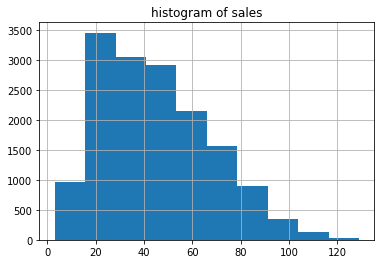

In [5]:
fig, ax = plt.subplots()
train.sales.hist(ax=ax);
ax.set_title('histogram of sales');

## Train a simple model

As you determined, you are dealing with a regression problem. So, now you're ready to build a model for a subsequent submission. But now, instead of building the simplest Linear Regression model as in the slides, let's build an out-of-box Random Forest model.

You will use the RandomForestRegressor class from the scikit-learn library.

Your objective is to train a Random Forest model with default parameters on the "store" and "item" features.

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest object
rf = RandomForestRegressor()

# Train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

RandomForestRegressor()

## Prepare a submission

You've already built a model on the training data from the Kaggle Store Item Demand Forecasting Challenge. Now, it's time to make predictions on the test data and create a submission file in the specified format.

Your goal is to read the test data, make predictions, and save these in the format specified in the "sample_submission.csv" file

In [8]:
# Show the head() of the sample_submission
print(sample_submission.head())

# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv('kaggle_submission.csv', index=False)

   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52


In [9]:
!head kaggle_submission.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


# Public vs Private leaderboard

![](kaggleComp-2.png)

## Train XGBoost models

Every Machine Learning method could potentially overfit. You will see it on this example with XGBoost. Again, you are working with the Store Item Demand Forecasting Challenge. The train DataFrame is available in your workspace.

Firstly, let's train multiple XGBoost models with different sets of hyperparameters using XGBoost's learning API. The single hyperparameter you will change is:

* max_depth - maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.


In [10]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:squarederror',
          'max_depth': 2,
          'verbosity': 1}

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

params = {'objective': 'reg:squarederror',
          'max_depth': 8,
          'verbosity': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

params = {'objective': 'reg:squarederror',
          'max_depth': 15,
          'verbosity': 1}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)



## Explore overfitting XGBoost

Having trained 3 XGBoost models with different maximum depths, you will now evaluate their quality. For this purpose, you will measure the quality of each model on both the train data and the test data. As you know by now, the train data is the data models have been trained on. The test data is the next month sales data that models have never seen before.

The goal of this exercise is to determine whether any of the models trained is overfitting. To measure the quality of the models you will use Mean Squared Error (MSE). It's available in sklearn.metrics as mean_squared_error() function that takes two arguments: true values and predicted values.

In [11]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)
    test_pred = model.predict(dtest)

    # Calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

MSE Train: 331.064. MSE Test: 249.412
MSE Train: 112.057. MSE Test: 30.502
MSE Train: 84.952. MSE Test: 3.502
